In [6]:
include("cohen_bergstresser.jl")

In [13]:
function run_example(Z, Ecut_pi, kdelta_pi, kpoints_path)
    lattice_constants = Dict(14 => 5.431020504 * angströmToBohr,
                             32 => 5.658 * angströmToBohr,
                             50 => 6.48920 * angströmToBohr)

    a = lattice_constants[Z]
    high_sym = Dict(
        :Γ => 2π/a .* [  0,   0,   0], 
        :X => 2π/a .* [  0,   1,   0], 
        :W => 2π/a .* [1/2,   1,   0], 
        :K => 2π/a .* [3/4, 3/4,   0], 
        :L => 2π/a .* [1/2, 1/2, 1/2],
        :U => 2π/a .* [1/4,   1, 1/4],
    )  
    S = construct_diamond_structure(a, Z, Ecut_pi * (2π / a)^2)

    println("max G = $(maximum(maximum, S.G_coords))")

    println("A (units of a)\n", S.A ./ a)
    println("B (units of 2π/a)\n", S.B ./ (2π / a)) 
    println("unit cell volume: $(S.unit_cell_volume)")
    println("")
    
    kdelta = kdelta_pi * (2π / a)
    plot_path = [(high_sym[p[1]], high_sym[p[2]]) for p in kpoints_path]
    ks, accu_length = construct_kpoints(plot_path, kdelta)
    
    # Plotting
    plot_potential(S)
    plot_lattice(S)

    shift = obtain_shift(S)
    println("Employing energy shift $shift")
    λs, vs = compute(S, ks, shift=shift)
    # assert_periodicity(S, ks, λs)
    plot_bands(S, accu_length, ks, λs, high_sym)
    title("Element with atomic number $Z")  
end

run_example (generic function with 1 method)

max G = 3
A (units of a)
[0.0 0.5 0.5; 0.5 0.0 0.5; 0.5 0.5 0.0]
B (units of 2π/a)
[-1.0 1.0 1.0; 1.0 -1.0 1.0; 1.0 1.0 -1.0]
unit cell volume: 270.2594804842533

Employing energy shift 0.38408509073307334

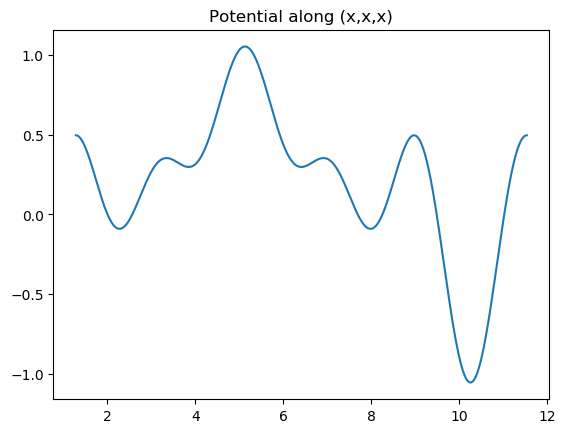

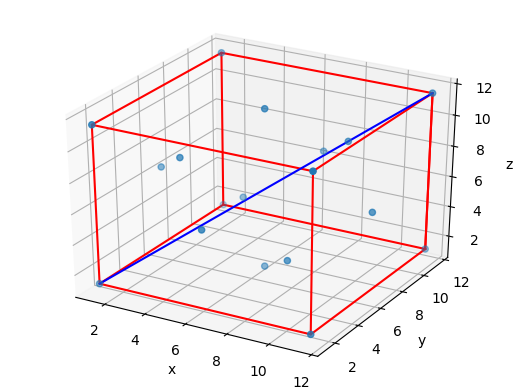

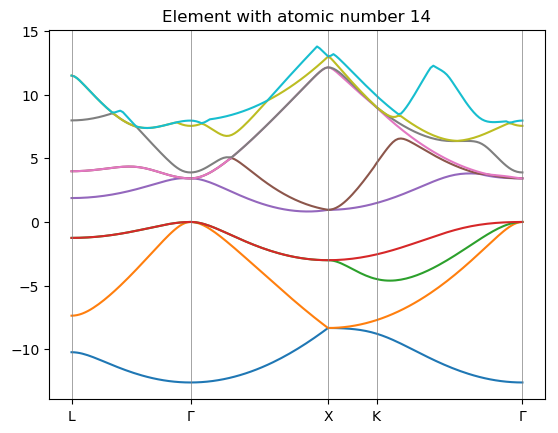

PyObject Text(0.5, 1.0, 'Element with atomic number 14')

In [14]:
Z = 14           # Si
Ecut_pi = 28     # in units of (2π / a)^2 
kdelta_pi = 0.02 # in units of (2π / a)
kpoints_path = [(:L, :Γ), (:Γ, :X), (:X, :U), (:K, :Γ)]

run_example(Z, Ecut_pi, kdelta_pi, kpoints_path)

max G = 3
A (units of a)
[0.0 0.5 0.5; 0.5 0.0 0.5; 0.5 0.5 0.0]
B (units of 2π/a)
[-1.0 1.0 1.0; 1.0 -1.0 1.0; 1.0 1.0 -1.0]
unit cell volume: 305.580361077403

Employing energy shift 0.34697106283319273

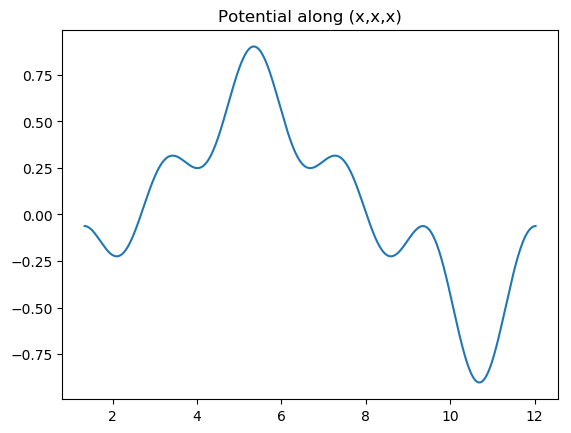

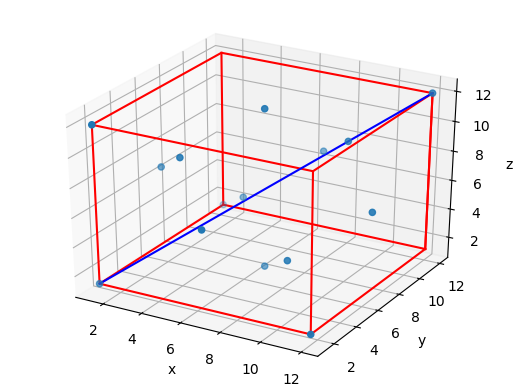

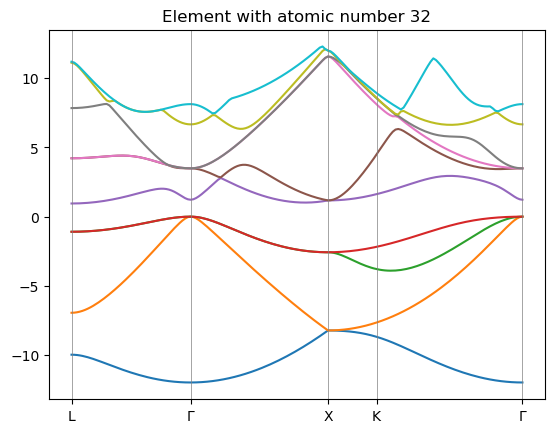

PyObject Text(0.5, 1.0, 'Element with atomic number 32')

In [15]:
Z = 32           # Ge
Ecut_pi = 28     # in units of (2π / a)^2 
kdelta_pi = 0.02 # in units of (2π / a)
kpoints_path = [(:L, :Γ), (:Γ, :X), (:X, :U), (:K, :Γ)]

run_example(Z, Ecut_pi, kdelta_pi, kpoints_path)

max G = 3
A (units of a)
[0.0 0.5 0.5; 0.5 0.0 0.5; 0.5 0.5 0.0]
B (units of 2π/a)
[-1.0 1.0 1.0; 1.0 -1.0 1.0; 1.0 1.0 -1.0]
unit cell volume: 461.0097270941695

Employing energy shift 0.25022866661759424

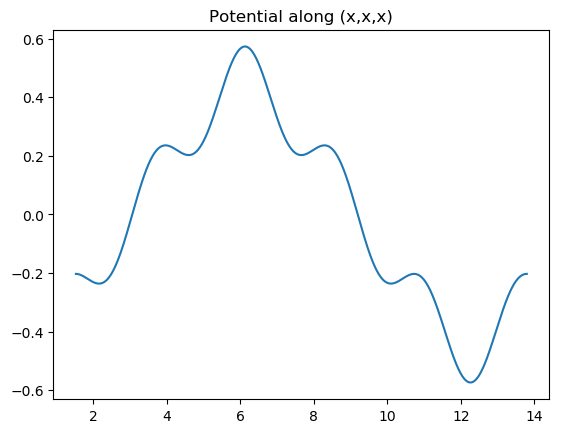

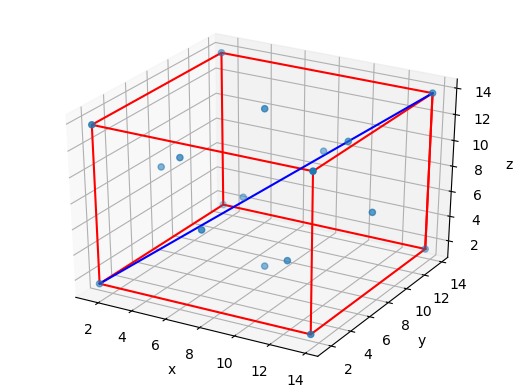

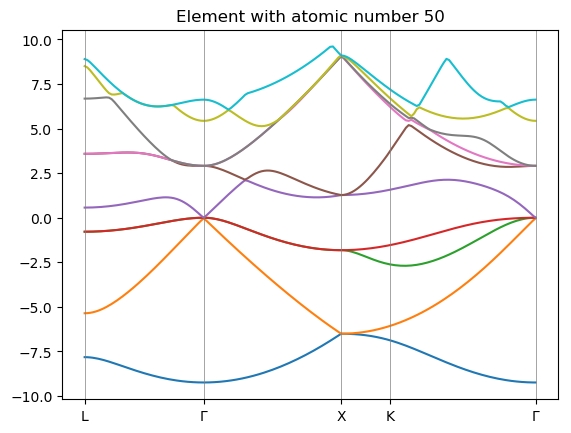

PyObject Text(0.5, 1.0, 'Element with atomic number 50')

In [16]:
Z = 50           # Sn
Ecut_pi = 28     # in units of (2π / a)^2 
kdelta_pi = 0.02 # in units of (2π / a)
kpoints_path = [(:L, :Γ), (:Γ, :X), (:X, :U), (:K, :Γ)]

run_example(Z, Ecut_pi, kdelta_pi, kpoints_path)